In [14]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

In [15]:
def manual_blur(image, kernel_size):
    """Manuální implementace rozmazání obrazu.

    Args:
        image (numpy.ndarray): Obrázek k rozmazání.
        kernel_size (int): Velikost kernelu.

    Returns:
        numpy.ndarray: Rozmazaný obrázek.
    """
    # Získání rozměrů obrazu
    h, w = image.shape[:2]
    
    # Vytvoření pole pro rozmazaný obraz stejného typu jako vstupní obrázek
    blurred_image = np.zeros_like(image)
    
    # Okrajové zpracování obrázku pomocí cv2.copyMakeBorder
    padded_image = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)
    
    # Průchod přes obrázek a aplikace rozmazání
    for i in range(h):
        for j in range(w):
            # Získání regionu zájmu (ROI) o velikosti kernel_size x kernel_size
            roi = padded_image[i:i+kernel_size, j:j+kernel_size]
            
            # Vypočtení průměru hodnot v ROI a uložení do výsledného obrázku
            blurred_image[i, j] = np.mean(roi, axis=(0, 1))
    
    return blurred_image


36 184


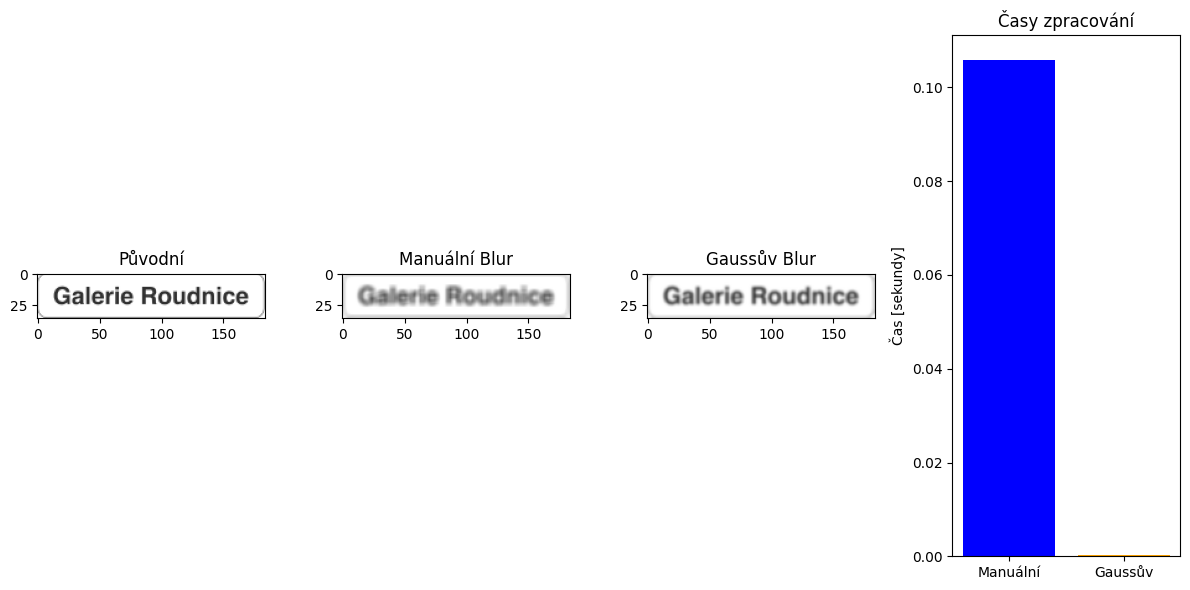

Čas pro manuální průměrování: 0.10582208633422852 sekund
Čas pro Gaussův blur: 0.00019240379333496094 sekund


In [22]:
# Načtení obrázku
image = cv2.imread('../assets/logo-roudnice.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definování velikosti matice
n = 5  # Velikost jádra

# Měření času pro manuální průměrování
start_time = time.time()
manual_blurred_image = manual_blur(image, n)
manual_time = time.time() - start_time

# Měření času pro Gaussův blur
start_time = time.time()
gaussian_blurred_image = cv2.GaussianBlur(image, (n, n), 0)
gaussian_time = time.time() - start_time

# Zobrazení výsledků
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Původní')

plt.subplot(1, 4, 2)
plt.imshow(manual_blurred_image)
plt.title('Manuální Blur')

plt.subplot(1, 4, 3)
plt.imshow(gaussian_blurred_image)
plt.title('Gaussův Blur')

# Zobrazení časů
plt.subplot(1, 4, 4)
plt.bar(['Manuální', 'Gaussův'], [manual_time, gaussian_time], color=['blue', 'orange'])
plt.title('Časy zpracování')
plt.ylabel('Čas [sekundy]')

plt.tight_layout()
plt.show()

print(f"Čas pro manuální průměrování: {manual_time} sekund")
print(f"Čas pro Gaussův blur: {gaussian_time} sekund")